In [1]:
# Dependencies
import os
import csv
import pandas as pd
import scipy.stats as stats
import numpy as np
import json
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import requests
from pathlib import Path

# Import API key, we have a paid subscription to https://polygon.io/
from api_keys import polygonio_key

# Create an array for each Stock Sector, in which we place each Stock that belongs
Consumer_Discretionary = []
Consumer_Staples = []
Information_Technology = []
Communication_Services = []

# In the resources subfolder we will read all data save the header from sp500list.csv
csvpath = os.path.join('./','resources','sp500list.csv')

# Open and read csv. From the resources folder we have a list of S&P 500 stock symbols 
# and which GICS sectror they belong to. Each stock sector list to be loaded with stock symbols
with open(csvpath,'r') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter = ',')
    # We will skip reading the header
    csv_header = next(csv_reader)
    # We will check by Industry Sector column D
    # which array will receive the current stock name Column A
    # We will not load AAPL - Apple into Information Technology
    # as we want an independent comparison
    for row in csv_reader:
        if row[3] == "Consumer Discretionary":
            if row[0] != "AMZN":
                Consumer_Discretionary.append(row[0])
        elif row[3] == "Consumer Staples":
            Consumer_Staples.append(row[0])
        elif row[3] == "Information Technology":
            if row[0] != "AAPL":
                Information_Technology.append(row[0])
        elif row[3] == "Communication Services":
            if row[0] not in ["NFLX", "GOOG", "GOOGL", "META", "FB", "META"]:    
                Communication_Services.append(row[0])
        else:
            pass

# Make a Data Dictionary of Sectors paired with their stock
Sector_Stock_dic = {
    'Consumer_Discretionary': Consumer_Discretionary,
    'Information_Technology': Information_Technology,
    'Consumer_Staples': Consumer_Staples,
    'Communication_Services': Communication_Services
}

# We will now obtain the stock price of AAPL
# We are only taking start and end period stock price, just as we will for all stock later.
stock = "AAPL"
datestart = "2022-04-04"
dateend = "2023-04-03"
# Build the endpoint URL
start_target_url = f"https://api.polygon.io/v1/open-close/{stock}/{datestart}?adjusted=true&apiKey={polygonio_key}"
print(start_target_url)
AAPL_data = requests.get(start_target_url).json()
AAPL_start_close = AAPL_data["close"]
end_target_url = f"https://api.polygon.io/v1/open-close/{stock}/{dateend}?adjusted=true&apiKey={polygonio_key}"
print(end_target_url)
AAPL_data = requests.get(end_target_url).json()
AAPL_end_close = AAPL_data["close"]
AAPL_volume = AAPL_data["volume"]  # This is by default on the end date of range
AAPL_dollarvolume = AAPL_volume * AAPL_end_close
AAPL_pct_chg = round((((AAPL_end_close - AAPL_start_close) / (AAPL_start_close)) * 100), 4)
Sector_AAPL = {"AAPL": [AAPL_start_close, AAPL_end_close, AAPL_pct_chg, AAPL_pct_chg, AAPL_volume, AAPL_dollarvolume, AAPL_dollarvolume]}

print("The JSON calls for Apple Stock AAPL are above");

https://api.polygon.io/v1/open-close/AAPL/2022-04-04?adjusted=true&apiKey=SgIYRysIBpkG768ZhGCSx0tqvpyGuoZy
https://api.polygon.io/v1/open-close/AAPL/2023-04-03?adjusted=true&apiKey=SgIYRysIBpkG768ZhGCSx0tqvpyGuoZy
The JSON calls for Apple Stock AAPL are above


In [2]:
Sector_AAPL

{'AAPL': [178.44,
  166.17,
  -6.8763,
  -6.8763,
  56976187.0,
  9467732993.789999,
  9467732993.789999]}

In [3]:
import csv
import requests

stocks = ["AAPL", "AMZN", "NFLX", "GOOG", "GOOGL", "FB"]  # "META"
stock_details_list = []  # Create an empty list to store stock details
datestart = "2022-04-04"
dateend = "2023-04-03"
filename = "./resources/FAANG" + ".csv"
results = {}
stock_data = {}  # Initialize the stock_data dictionary

for stock in stocks:
    stock_data[stock] = []
    modified_stock = stock  # Variable to hold modified stock symbol
    # Build the endpoint URL
    start_target_url = f"https://api.polygon.io/v1/open-close/{stock}/{datestart}?adjusted=true&apiKey={polygonio_key}"
    print(start_target_url)
    start_response = requests.get(start_target_url).json()
    start_close = start_response["close"]
    
    if stock == "FB":
        modified_stock = "META"

    end_target_url = f"https://api.polygon.io/v1/open-close/{modified_stock}/{dateend}?adjusted=true&apiKey={polygonio_key}"
    print(end_target_url)
    end_response = requests.get(end_target_url).json()
    end_close = end_response["close"]
    volume = end_response["volume"]
    dollar_volume = volume * end_close
    pct_chg = round((((end_close - start_close) / start_close) * 100), 4)
    stock_result = [start_close, end_close, pct_chg, pct_chg, volume, dollar_volume, dollar_volume]
    results[stock] = stock_result
    stock_data[stock].append(start_close)

with open(filename, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)

    for stock, data in results.items():
        stock_details = { 'stock': stock,
            'start_close': data[0],
            'end_close': data[1],
            'pct_chg': data[2],
            'sectpct_chg': data[2],
            'volume': data[4],
            'dollar_volume': data[5]
        }
        stock_details_list.append(stock_details)  # Append the stock_details dictionary to the list
        writer.writerow([stock, stock_details['start_close'], stock_details['end_close'], stock_details['pct_chg'], stock_details['pct_chg'], stock_details['volume'], stock_details['dollar_volume']])
        print(stock_details['stock'],stock_details['start_close'], stock_details['end_close'], stock_details['pct_chg'], stock_details['pct_chg'], stock_details['volume'], stock_details['dollar_volume'])


https://api.polygon.io/v1/open-close/AAPL/2022-04-04?adjusted=true&apiKey=SgIYRysIBpkG768ZhGCSx0tqvpyGuoZy
https://api.polygon.io/v1/open-close/AAPL/2023-04-03?adjusted=true&apiKey=SgIYRysIBpkG768ZhGCSx0tqvpyGuoZy
https://api.polygon.io/v1/open-close/AMZN/2022-04-04?adjusted=true&apiKey=SgIYRysIBpkG768ZhGCSx0tqvpyGuoZy
https://api.polygon.io/v1/open-close/AMZN/2023-04-03?adjusted=true&apiKey=SgIYRysIBpkG768ZhGCSx0tqvpyGuoZy
https://api.polygon.io/v1/open-close/NFLX/2022-04-04?adjusted=true&apiKey=SgIYRysIBpkG768ZhGCSx0tqvpyGuoZy
https://api.polygon.io/v1/open-close/NFLX/2023-04-03?adjusted=true&apiKey=SgIYRysIBpkG768ZhGCSx0tqvpyGuoZy
https://api.polygon.io/v1/open-close/GOOG/2022-04-04?adjusted=true&apiKey=SgIYRysIBpkG768ZhGCSx0tqvpyGuoZy
https://api.polygon.io/v1/open-close/GOOG/2023-04-03?adjusted=true&apiKey=SgIYRysIBpkG768ZhGCSx0tqvpyGuoZy
https://api.polygon.io/v1/open-close/GOOGL/2022-04-04?adjusted=true&apiKey=SgIYRysIBpkG768ZhGCSx0tqvpyGuoZy
https://api.polygon.io/v1/open-close

In [4]:
# Print the comparative stock extract file
key = list(Sector_AAPL.keys())[0]
compare_sector_values = Sector_AAPL[key][0:6]
compare_sector_values.insert(0, key)

print(compare_sector_values)

file_name = "./resources/" + str(key) + ".txt"

# Create the file
open(file_name, "w").close()

# Open the file in append mode
with open(file_name, "a") as file:
    # Convert the list to a string
    values_str = ', '.join(str(value) for value in compare_sector_values)
    
    # Write the value to the file
    file.write(values_str)



['AAPL', 178.44, 166.17, -6.8763, -6.8763, 56976187.0, 9467732993.789999]


In [5]:
print("Here is the data dictionary of each key sector name and the populated Stock sector lists");
Sector_Stock_dic

Here is the data dictionary of each key sector name and the populated Stock sector lists


{'Consumer_Discretionary': ['AAP',
  'APTV',
  'AZO',
  'BBWI',
  'BBY',
  'BKNG',
  'BWA',
  'CZR',
  'KMX',
  'CCL',
  'CMG',
  'DHI',
  'DRI',
  'DG',
  'DLTR',
  'DPZ',
  'EBAY',
  'ETSY',
  'EXPE',
  'F',
  'GRMN',
  'GM',
  'GPC',
  'HAS',
  'HLT',
  'HD',
  'LVS',
  'LEN',
  'LKQ',
  'LOW',
  'MAR',
  'MCD',
  'MGM',
  'MHK',
  'NWL',
  'NKE',
  'NCLH',
  'NVR',
  'ORLY',
  'POOL',
  'PHM',
  'RL',
  'ROST',
  'RCL',
  'SBUX',
  'TPR',
  'TGT',
  'TSLA',
  'TJX',
  'TSCO',
  'ULTA',
  'VFC',
  'WHR',
  'WYNN',
  'YUM'],
 'Information_Technology': ['ACN',
  'ADBE',
  'ADP',
  'AKAM',
  'AMD',
  'APH',
  'ADI',
  'ANSS',
  'AMAT',
  'ANET',
  'ADSK',
  'AVGO',
  'BR',
  'CDNS',
  'CDW',
  'CDAY',
  'CSCO',
  'CTSH',
  'GLW',
  'DXC',
  'ENPH',
  'EPAM',
  'FFIV',
  'FIS',
  'FISV',
  'FLT',
  'FTNT',
  'IT',
  'GPN',
  'HPE',
  'HPQ',
  'IBM',
  'INTC',
  'INTU',
  'JKHY',
  'JNPR',
  'KEYS',
  'KLAC',
  'LRCX',
  'MA',
  'MCHP',
  'MU',
  'MSFT',
  'MPWR',
  'MSI',
  'NTAP',
  'G

In [6]:
AllSectors = {}
# This code will populate for each stock the start, end and pct change in stock price
# It will not populate the element sector change in price pct
# As that will be done by the following block of code
# Loop through each sector and the stocks in that sector
# We can loop through the Data Dictionary by Sector key name and Stock sector list
for sector, stocks in Sector_Stock_dic.items():
    # Create a list to store the data for each stock in the current sector
    sector_data = []
    
    #count = 0
    for stock in stocks:
        #if count == 15:
            #break
        first_stock_target_url = f"https://api.polygon.io/v1/open-close/{stock}/{datestart}?adjusted=true&apiKey={polygonio_key}"
        first_stocks_data = requests.get(first_stock_target_url).json()
        #count = count + 1
        try:
            start_price = first_stocks_data['close']
        except KeyError:
            # Handle the case where 'close' key is not present in the stocks_data
            if stock != "FB":
                print(f"No first data found for {stock}")
            continue
        last_stock_target_url = f"https://api.polygon.io/v1/open-close/{stock}/{dateend}?adjusted=true&apiKey={polygonio_key}"
        last_stocks_data = requests.get(last_stock_target_url).json()

        try:
            end_price = last_stocks_data['close']
            l_volume = last_stocks_data['volume']
        except KeyError:
            # Handle the case where 'close' key is not present in the stocks_data
            print(f"No last data found for {stock}")
            continue
        
        
        l_dollar_volume = l_volume * end_price
        pct_change = round((((end_price - start_price)/(start_price)) * 100),4)
        # Append the data for the current stock to the sector_data list
        sector_data.append([stock, start_price, end_price, pct_change, None,l_volume,l_dollar_volume])
        
    # Add the sector_data list to the dictionary with the sector name as the key
    AllSectors[sector] = sector_data


    
        

No first data found for GEN
No first data found for FB 
No first data found for WBD


In [7]:
# Show the Data Dictionary All Sectors of Sector name and Stock value attributes
# The output has these values. Volume and price are of trade on the last day.
# [stock, start_price, end_price, pct_change, None, stock trade volume, stock trade dollar volume]
AllSectors
for key, value in AllSectors.items():
    print("Key:", key)
    print("Value:", value)
    print("---")


Key: Consumer_Discretionary
Value: [['AAP', 211.92, 122.69, -42.1055, None, 1476318.0, 181129455.42], ['APTV', 118.73, 110.49, -6.9401, None, 1927033.0, 212917876.17], ['AZO', 2016.38, 2511.54, 24.5569, None, 207137, 520232860.98], ['BBWI', 47.82, 36.5, -23.6721, None, 3429617.0, 125181020.5], ['BBY', 94.34, 78.51, -16.7797, None, 2220825.0, 174356970.75], ['BKNG', 2374.97, 2665.19, 12.2199, None, 223115, 594643866.85], ['BWA', 38.79, 48.7, 25.5478, None, 1733155.0, 84404648.5], ['CZR', 80.69, 49.28, -38.9268, None, 2550488.0, 125688048.64], ['KMX', 101.37, 64.58, -36.2928, None, 1797666.0, 116093270.28], ['CCL', 19.74, 9.97, -49.4934, None, 39031873.0, 389147773.81], ['CMG', 1610.75, 1717.73, 6.6416, None, 245880, 422355452.4], ['DHI', 76.66, 98.12, 27.9937, None, 3955888.0, 388151730.56], ['DRI', 131.29, 153.89, 17.2138, None, 1767459.0, 271994265.51], ['DG', 226.27, 211.87, -6.3641, None, 2235083.0, 473547035.21000004], ['DLTR', 156.77, 148.01, -5.5878, None, 3394101.0, 502360889.01

In [8]:
# Loop through each sector and populate the sector pct change into posn [4]
# Each stock in the sector will give a non weighted average change of worth.
# I had considered adding a weighted average value percebtage per sector.
for sector in AllSectors:
    # Initialize a variable to keep track of the sum of the fourth value in each stock's list
    sum_fourth_value = 0
    sum_seventh_value = 0
    # Initialize a variable to keep track of the number of stocks in the sector
    num_stocks = 0
    # Loop through each stock in the sector
    for stock in AllSectors[sector]:
        # Add the individual stocks value pct change to an industry sum
        sum_fourth_value += stock[3]
        #sum_seventh_value += stock[6]
        # Increment the number of stocks
        num_stocks += 1
    # Calculate the average of the fourth value for the sector
    avg_fourth_value = sum_fourth_value / num_stocks
    #avg_seventh_value = sum_seventh_value / num_stocks
    # Loop through each stock in the sector again
    for stock in AllSectors[sector]:
        # Overwrite the fifth value of the stock with the average of the fourth value 
        # for the sector. Note, this is Non-weighted average.
        stock[4] = round(avg_fourth_value,4)
        #stock[7] = round(avg_seventh_value,4)

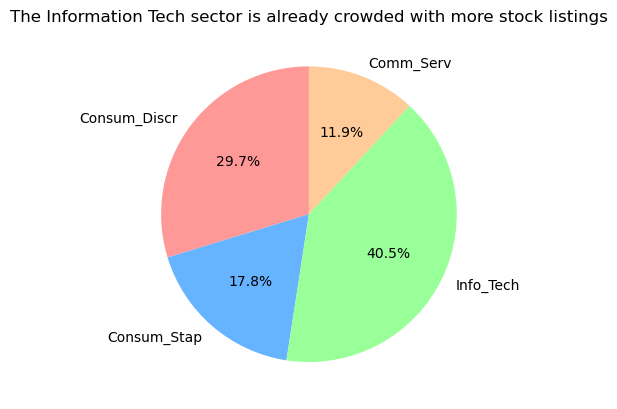

In [9]:


# Plot a pie graph showing the count of listed companies per sector to see if 
# the Info Tech Sector is under represented.
# Calculate the number of elements in each list
sizes = [len(Consumer_Discretionary), len(Consumer_Staples), (len(Information_Technology)+1), len(Communication_Services)]

# Define the categories
categories = ['Consum_Discr', 'Consum_Stap', 'Info_Tech', 'Comm_Serv']
# Define the colors for the pie chart
colors = ['#ff9998','#66b3ff','#99ff99','#ffcc99']

# Plot the pie chart
plt.pie(sizes, labels=categories, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('The Information Tech sector is already crowded with more stock listings')

# Show the plot
plt.show()

In [10]:
for key, value in AllSectors.items():
    print("Key:", key)
    print("Value:", value)
    print("---")

Key: Consumer_Discretionary
Value: [['AAP', 211.92, 122.69, -42.1055, -4.2561, 1476318.0, 181129455.42], ['APTV', 118.73, 110.49, -6.9401, -4.2561, 1927033.0, 212917876.17], ['AZO', 2016.38, 2511.54, 24.5569, -4.2561, 207137, 520232860.98], ['BBWI', 47.82, 36.5, -23.6721, -4.2561, 3429617.0, 125181020.5], ['BBY', 94.34, 78.51, -16.7797, -4.2561, 2220825.0, 174356970.75], ['BKNG', 2374.97, 2665.19, 12.2199, -4.2561, 223115, 594643866.85], ['BWA', 38.79, 48.7, 25.5478, -4.2561, 1733155.0, 84404648.5], ['CZR', 80.69, 49.28, -38.9268, -4.2561, 2550488.0, 125688048.64], ['KMX', 101.37, 64.58, -36.2928, -4.2561, 1797666.0, 116093270.28], ['CCL', 19.74, 9.97, -49.4934, -4.2561, 39031873.0, 389147773.81], ['CMG', 1610.75, 1717.73, 6.6416, -4.2561, 245880, 422355452.4], ['DHI', 76.66, 98.12, 27.9937, -4.2561, 3955888.0, 388151730.56], ['DRI', 131.29, 153.89, 17.2138, -4.2561, 1767459.0, 271994265.51], ['DG', 226.27, 211.87, -6.3641, -4.2561, 2235083.0, 473547035.21000004], ['DLTR', 156.77, 148.

In [11]:
# Output will be written to the file for all sectors
# The comparison stock spool has already been run.
import os
# Iterate over the items in AllSectors

for key, value in AllSectors.items():
    # Generate the file name based on the key
    file_name = "./resources/" + str(key) + ".csv"

    # Open the file in write mode
    with open(file_name, "w") as file:
        # Iterate over each sublist in the value list
        for sublist in value:
            # Convert each element of the sublist to a string
            formatted_sublist = [str(item) for item in sublist]

            # Write the formatted sublist to the file on a separate line
            file.write(", ".join(formatted_sublist) + "\n")








   




In [12]:
import csv
from scipy import stats

tsector = []
tptest = []
sect_pct = []

with open('./resources/ttest.csv', 'w', newline='') as file:
    writer = csv.writer(file)

    for sector in AllSectors:
        sector_pct_moves = [stock[3] for stock in AllSectors[sector]]
        avg_sector_pct_move = sum(sector_pct_moves) / len(sector_pct_moves)

        for stock_details in stock_details_list:
            stockpct_moves = [stock_details['pct_chg']] * len(sector_pct_moves)

            l_sector_pct_diff = stockpct_moves[0]
            rl_sector_pct_diff = round(l_sector_pct_diff, 4)

            difference_pct = round(abs(l_sector_pct_diff - avg_sector_pct_move), 4)

            # Calculate Independent (Two Sample) t-test
            t_stat, p_val = stats.ttest_ind(stockpct_moves, sector_pct_moves, equal_var=False)
            print(f"{stock_details['stock']}: {sector} - t-statistic = {t_stat:.3f}, p-value = {p_val:.3f}")
            print(f"-------------------------------------")
            
            if stock_details['stock'] == 'AAPL':
                tsector.append(sector)
                tptest.append(p_val)
                sect_pct.append(avg_sector_pct_move)
            
            writer.writerow([stock_details['stock'], sector, f"{t_stat:.3f}", f"{p_val:.3f}"])


    

AAPL: Consumer_Discretionary - t-statistic = -0.711, p-value = 0.480
-------------------------------------
AMZN: Consumer_Discretionary - t-statistic = -9.479, p-value = 0.000
-------------------------------------
NFLX: Consumer_Discretionary - t-statistic = -1.842, p-value = 0.071
-------------------------------------
GOOG: Consumer_Discretionary - t-statistic = -6.166, p-value = 0.000
-------------------------------------
GOOGL: Consumer_Discretionary - t-statistic = -6.177, p-value = 0.000
-------------------------------------
FB: Consumer_Discretionary - t-statistic = -1.261, p-value = 0.213
-------------------------------------
AAPL: Information_Technology - t-statistic = 0.397, p-value = 0.693
-------------------------------------
AMZN: Information_Technology - t-statistic = -16.705, p-value = 0.000
-------------------------------------
NFLX: Information_Technology - t-statistic = -1.808, p-value = 0.075
-------------------------------------
GOOG: Information_Technology - t-stati

In [13]:
tptest

[0.4798491601337166,
 0.6926634180771671,
 0.02048235078738659,
 0.007354751083061676]

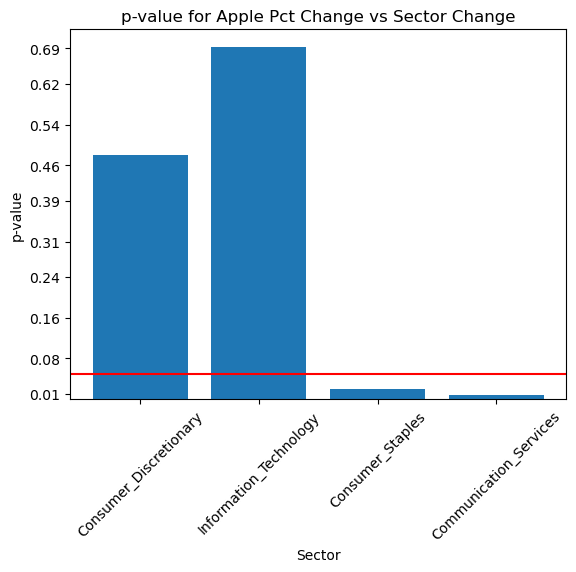

In [14]:
# create the bar chart to show against a red line which tests fail NullHypothesis
# Any sector bar graph below the line shows a proven incompatability
fig, ax = plt.subplots()
ax.bar(tsector, tptest)
ax.axhline(y=0.05, color='r', linestyle='-')
ax.set_xlabel('Sector')
ax.set_ylabel('p-value')
ax.set_title('p-value for Apple Pct Change vs Sector Change')

# set tick labels for x and y axis
ax.set_xticklabels(tsector, rotation=45)

# set y-tick labels to show even increments
num_ticks = 10
tick_increment = (max(tptest) - min(tptest)) / (num_ticks - 1)
tick_labels = [round(min(tptest) + i * tick_increment, 2) for i in range(num_ticks)]
ax.set_yticks(tick_labels)
ax.set_yticklabels(tick_labels)

plt.show()





In [15]:
Sector_AAPL

{'AAPL': [178.44,
  166.17,
  -6.8763,
  -6.8763,
  56976187.0,
  9467732993.789999,
  9467732993.789999]}

In [16]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

num_ticks = 20
tick_increment = (max(sect_pct) - min(sect_pct)) / (num_ticks - 1)

applesect = tsector[:]
applesect.append('AAPL')

apple_sect_pct = sect_pct[:]
l_value = Sector_AAPL['AAPL'][3]
apple_sect_pct.append(l_value)



In [17]:
applesect

['Consumer_Discretionary',
 'Information_Technology',
 'Consumer_Staples',
 'Communication_Services',
 'AAPL']

In [18]:
apple_sect_pct

[-4.256063636363637, -7.6256, 1.1893818181818179, -24.396755000000002, -6.8763]

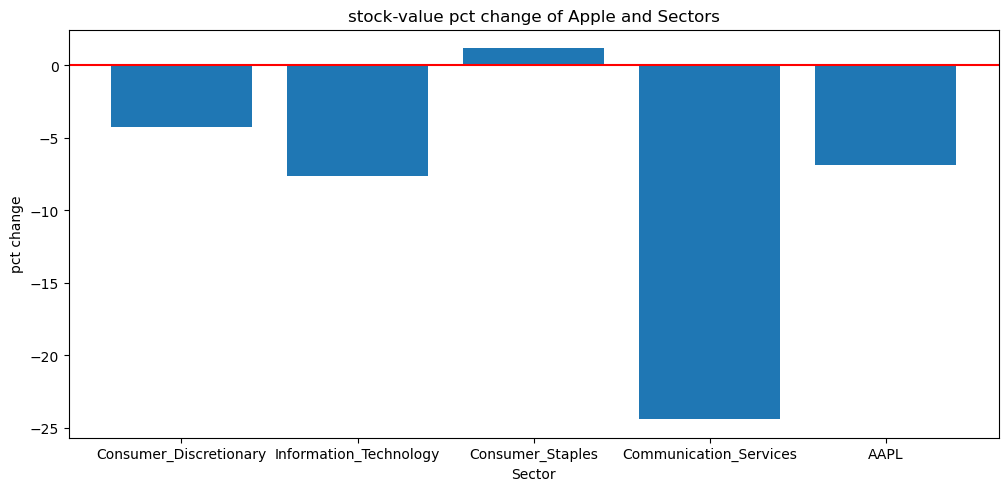

In [19]:

# We are just giving a bar graph here to show AAPL stock (Apple against sectors)
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(applesect, apple_sect_pct)
ax.axhline(y=0, color='r', linestyle='-')
ax.set_xlabel('Sector')
ax.set_ylabel('pct change')
ax.set_title('stock-value pct change of Apple and Sectors')
# set tick labels for x and y axis
#ax.set_xticklabels(tsector, rotation=45)
fig.subplots_adjust(bottom=0.2)
plt.show()

In [20]:
# In this block we test change in share share $ volume of AAPL against Sectors Average
# Our consistant p-values of 0 show that dollar trade volume 
# is not an indicator of belonging to a sector.

Apple_dollar_vol = []
sector_dollar_vol = []
#We create Apple_pct_moves as an array of itself of same length as comparative sector

for sector2 in AllSectors:
    sector_dollar_vol = [stock[6] for stock in AllSectors[sector2]]
    Apple_dollar_vol = [Sector_AAPL["AAPL"][6]] * len(sector_dollar_vol)
    print(sector_dollar_vol)
    print(Apple_dollar_vol)
  
    t_stat, p_val = stats.ttest_ind(Apple_dollar_vol, sector_dollar_vol, equal_var=False)
    print(f"{sector2}: t-statistic = {t_stat:.3f}, p-value = {p_val:.3f}")
    
    print(f"-------------------------------------")


    # In the output below you see the $value entries of each stock in the Sector as a list. 
    # You then see a list of equal element length, with repeat entries 
    # of Apple turnover on the last date.
    # and finally statistical test showing that stock $ turnover 
    # is not an indicator of AAPl (Apple) stock belonging to any sector.

[181129455.42, 212917876.17, 520232860.98, 125181020.5, 174356970.75, 594643866.85, 84404648.5, 125688048.64, 116093270.28, 389147773.81, 422355452.4, 388151730.56, 271994265.51, 473547035.21000004, 502360889.01, 265773592.92, 156739200.12, 260879036.0, 168178069.44, 709525719.16, 99956844.56, 394904713.32000005, 140892093.44, 79378898.7, 179161263.62, 1193170243.3400002, 336543756.32, 145802930.25, 41161081.5, 708065609.2, 252122607.18, 663795292.24, 166136094.0, 47134889.62, 54761262.75, 588688006.33, 126508231.2, 111974559.3, 305970601.95, 135939510.5, 111741929.0, 80947540.96, 395127503.09999996, 157068826.75, 404233447.5, 99301415.62, 455734565.82, 32962680030.0, 352073624.4, 255578407.7, 303931126.71000004, 138463607.15, 74336992.29, 424264794.59, 173073225.71]
[9467732993.789999, 9467732993.789999, 9467732993.789999, 9467732993.789999, 9467732993.789999, 9467732993.789999, 9467732993.789999, 9467732993.789999, 9467732993.789999, 9467732993.789999, 9467732993.789999, 9467732993.7

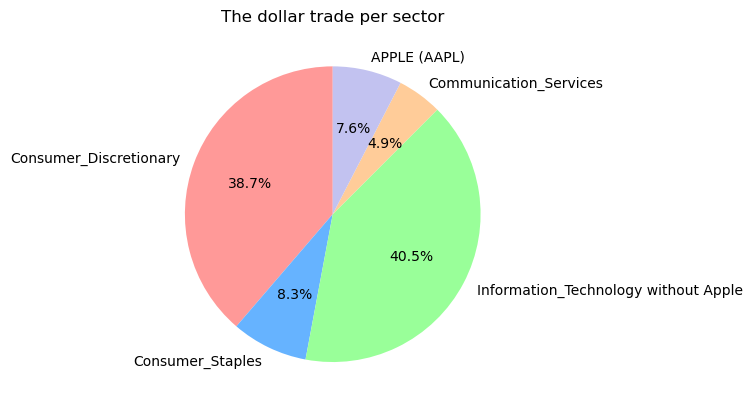

In [21]:
# Create a pie graph showing $ trade value across sector on end day
# Calculate the number of elements in each list
dol_vol_aapl = Sector_AAPL['AAPL'][6]
for sector in AllSectors:
    sum_sixth_value = 0
    for stock in AllSectors[sector]:
        # Add the sixth value of the stock to the sum
        sum_sixth_value += stock[6]
    # Assign the sum to the appropriate variable based on the sector
    if sector == 'Consumer_Discretionary':
        dol_vol_cd = sum_sixth_value
    elif sector == 'Information_Technology':
        dol_vol_it = sum_sixth_value
    elif sector == 'Consumer_Staples':
        dol_vol_cst = sum_sixth_value
    elif sector == 'Communication_Services':
        dol_vol_csr = sum_sixth_value

# Create the list of sizes
sizes2 = [dol_vol_cd, dol_vol_cst, dol_vol_it, dol_vol_csr, dol_vol_aapl]

# Define the categories
categories = ['Consumer_Discretionary', 'Consumer_Staples', 'Information_Technology without Apple', 'Communication_Services', 'APPLE (AAPL)']

# Define the colors for the pie chart
colors = ['#ff9998', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Plot the pie chart
plt.pie(sizes2, labels=categories, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('The dollar trade per sector')

# Show the plot
plt.show()


# AAPL (Apple) Stock is such a considerable stock in can overweight or rebalance any sector.


